### Kagome lattice construction

[]

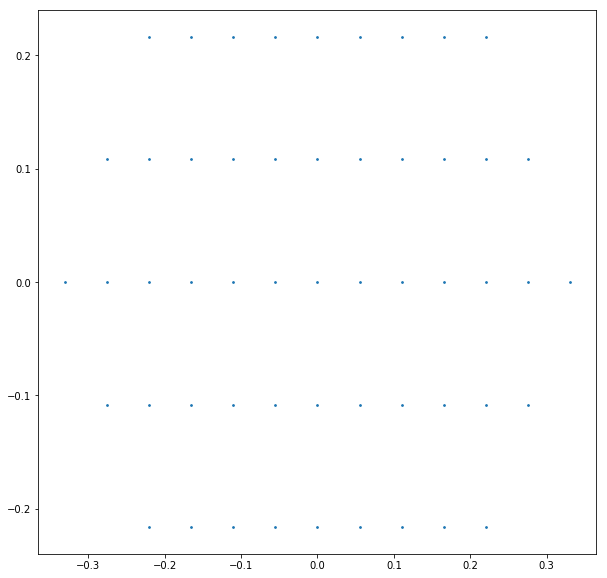

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from numpy import pi, sqrt, linspace

#kd  = (4*pi/3)  # dirac point
a = 41*graphene.a
b=2*pi/(a) #Reciprocal lattice vector

nn = 3# Increase this value to increase the sampling of K-points in BZ
pp = 4*nn

nnx = int(round(pp*2/sqrt(3)))
ddnx = (2*b/sqrt(3))/nnx

nny = int(pp)
ddny = b/nny;

kx1 = np.linspace((-b/sqrt(3))-ddnx/2,(b/sqrt(3))+ddnx/2,nnx+1)
ky1 = np.linspace(-b-ddny/2,b+ddny/2,nny+1)

bb = b
kk1 = 0

temp1 = np.zeros((round((nnx*nny)*(3/8)),2))
for ii in range (0,nnx):
    for jj in range (0,nny):
        kx = kx1[ii]
        ky = ky1[jj]
        if ((sqrt(3)*kx-b)<=ky and (ky<=(-sqrt(3)*kx+b)   # this condition make the hexagonal shape
            and (sqrt(3)*kx+b)>=ky) and (ky>=-sqrt(3)*kx-b)
            and (-b/2<=ky) and (ky<=b/2)):
            kk1 =kk1+1
            temp1[kk1,0] = kx
            temp1[kk1,1] = ky    
#print (temp1)
sample = temp1[1:54,:]
#print (temp1.shape[0])  # print the number of column
#print (sample)
kx=sample[:,0]
ky=sample[:,1]
plt.figure(figsize=(10,10))
plt.scatter(kx,ky,s=3)
plt.plot()

In [3]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
pb.pltutils.use_style()
%matplotlib inline
from pybinding.repository import graphene
from math import pi, sqrt

def model2(a, V_A, V_B):    # V_A: left potential. V_B: right potential. width: width of the superlattice.
    # 1. a should be odd numbers because if a is even, the model becomes a little unsymmetric.
    # 2. a should? not be three's multiple numbers because the brilluiin points(K and Gamma) switch.
    def mass_term(c, V_A, V_B):   # c determines the area potential is applied. b determines the potential amplitude.
        @pb.onsite_energy_modifier
        def potential(energy, x, y):
            energy[np.tan(np.pi/3)*x+y<-c] = V_A
            energy[np.tan(np.pi/3)*x+y>c] = V_B
            energy[(np.tan(np.pi/3)*x+y>-c)&(np.tan(np.pi/3)*x+y<c)] = 0
            return energy
        return potential
    width = a*graphene.a  # nm
    b = a
    print ("the superlattice width is ", width, "nm")
    ###################################### model without potential ######################################
    without_potential = pb.Model(graphene.monolayer(),
                                 pb.primitive(a1=a, a2=b),
                                 pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a)
    )
    ######################################## model with potential ########################################
    with_potential = pb.Model(graphene.monolayer(),
                              pb.primitive(a1=a, a2=b),
                              pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a),
                              mass_term(np.tan(np.pi/3)*0.5*width,V_A,V_B)   # for this condition, the potential area is suited for kagome lattice.
    )
     
    ############################################### DOS ###############################################
    f, axs = plt.subplots(1,2,figsize=(13,7))
    f.suptitle("DOS for 0 eV and given potential", fontsize=16)
    f.tight_layout()
    f.subplots_adjust(top=0.88)
    ax1 = plt.subplot(121)
    ax1.set_title('without potential')
    
    solver = pb.solver.lapack(without_potential)
    solver.set_wave_vector([0,0])
    lapack_dos = solver.calc_dos(np.linspace(-9, 9, 2500), broadening=0.01)
    data1=lapack_dos.data
    for i in range(0,52):
        solver = pb.solver.lapack(without_potential)
        solver.set_wave_vector([kx[i],ky[i]])
        lapack_dos = solver.calc_dos(np.linspace(-9, 9, 2500), broadening=0.01)
        data1+=lapack_dos.data
    data1=data1/52
    plt.plot(data1, np.linspace(-9, 9, 2500),label='position: [4.5,3]',color='b')   # To switch the x and y axis
    plt.ylim(-0.5, 0.5)
    
    ax2 = plt.subplot(122)
    ax2.set_title('with potential')
    solver = pb.solver.lapack(with_potential)
    solver.set_wave_vector([0,0])
    lapack_dos = solver.calc_dos(np.linspace(-9, 9, 2500), broadening=0.01)
    data2=lapack_dos.data
    for i in range(0,52):
        solver = pb.solver.lapack(with_potential)
        solver.set_wave_vector([kx[i],ky[i]])
        lapack_dos = solver.calc_dos(np.linspace(-9, 9, 2500), broadening=0.01)
        data2+=lapack_dos.data
    data2=data2/52
    plt.plot(data2, np.linspace(-9, 9, 2500),label='position: [4.5,3]',color='b')   # To switch the x and y axis
    plt.ylim(-0.5, 0.5)

## -1, +1 potential with 52-points 

the superlattice width is  10.08395 nm


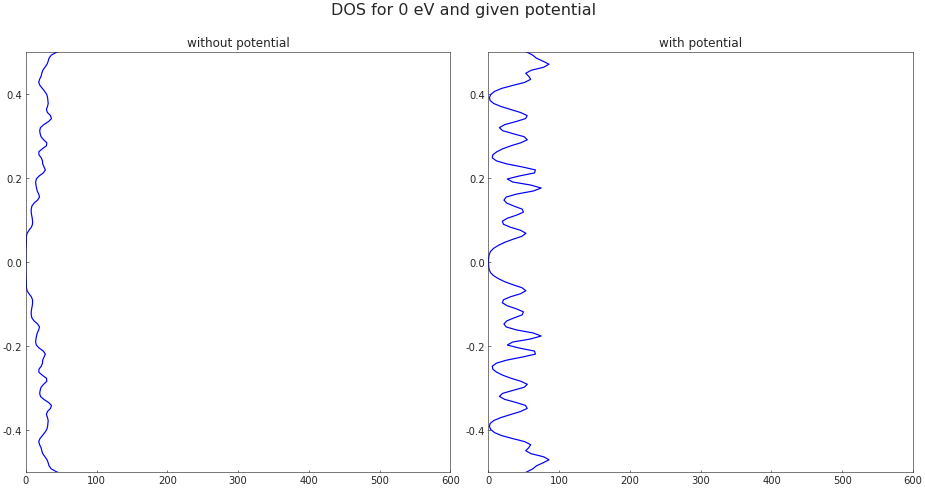

In [4]:
model2(41,-1,1)  # a: need to put odd number, V_A, V_B

In [ ]:
def mass_term(c, V_A, V_B):   # c determines the area potential is applied. b determines the potential amplitude.
        @pb.onsite_energy_modifier
        def potential(energy, x, y):
            energy[np.tan(np.pi/3)*x+y<-c] = V_A
            energy[np.tan(np.pi/3)*x+y>c] = V_B
            energy[(np.tan(np.pi/3)*x+y>-c)&(np.tan(np.pi/3)*x+y<c)] = 0
            return energy
        return potential
width = 41*graphene.a
without_potential = pb.Model(graphene.monolayer(),
                             pb.primitive(a1=41, a2=41),
                             pb.translational_symmetry(a1=41*graphene.a, a2=41*graphene.a)
)
    ######################################## model with potential ########################################
with_potential = pb.Model(graphene.monolayer(),
                          pb.primitive(a1=41, a2=41),
                          pb.translational_symmetry(a1=41*graphene.a, a2=41*graphene.a),
                          mass_term(np.tan(np.pi/3)*0.5*width,-1,1)   # for this condition, the potential area is suited for kagome lattice.
)
     
a=41
b=41
a_cc = graphene.a_cc
a2 = a*graphene.a_cc*sqrt(3)
b2= b*graphene.a_cc*sqrt(3)
Gamma = [0, 0]
K1 = [-4*pi / (3*a2), 0]
M = [0, 2*pi / (sqrt(3)*b2)]
K2 = [2*pi / (3*a2), 2*pi / (sqrt(3)*b2)]

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure of 0eV and given potential", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)
ax1 = plt.subplot(121)
ax1.set_title('Potential: 0 eV')
solver = pb.solver.lapack(without_potential)
bands = solver.calc_bands(K1,Gamma,M,K2)
bands.plot(color='r')
plt.ylim(-0.5, 0.5)

ax2 = plt.subplot(122)
ax2.set_title('Potential: given potential by model function')
solver = pb.solver.lapack(with_potential)
bands = solver.calc_bands(K1,Gamma,M,K2)
bands.plot(color='b')
plt.ylim(-0.5, 0.5)

## -0.5, +0.5 potential with 52-points 

the superlattice width is  10.08395 nm


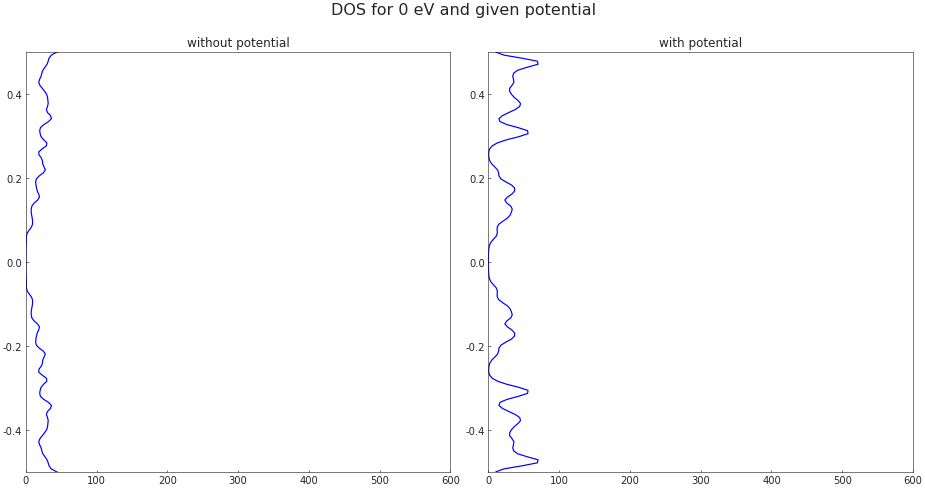

In [5]:
model2(41,-0.5,0.5)  # a: need to put odd number, V_A, V_B

In [ ]:
def mass_term(c, V_A, V_B):   # c determines the area potential is applied. b determines the potential amplitude.
        @pb.onsite_energy_modifier
        def potential(energy, x, y):
            energy[np.tan(np.pi/3)*x+y<-c] = V_A
            energy[np.tan(np.pi/3)*x+y>c] = V_B
            energy[(np.tan(np.pi/3)*x+y>-c)&(np.tan(np.pi/3)*x+y<c)] = 0
            return energy
        return potential
width = 41*graphene.a
without_potential = pb.Model(graphene.monolayer(),
                             pb.primitive(a1=41, a2=41),
                             pb.translational_symmetry(a1=41*graphene.a, a2=41*graphene.a)
)
    ######################################## model with potential ########################################
with_potential = pb.Model(graphene.monolayer(),
                          pb.primitive(a1=41, a2=41),
                          pb.translational_symmetry(a1=41*graphene.a, a2=41*graphene.a),
                          mass_term(np.tan(np.pi/3)*0.5*width,-0.5,0.5)   # for this condition, the potential area is suited for kagome lattice.
)
     
     
a=41
b=41
a_cc = graphene.a_cc
a2 = a*graphene.a_cc*sqrt(3)
b2= b*graphene.a_cc*sqrt(3)
Gamma = [0, 0]
K1 = [-4*pi / (3*a2), 0]
M = [0, 2*pi / (sqrt(3)*b2)]
K2 = [2*pi / (3*a2), 2*pi / (sqrt(3)*b2)]

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure of 0eV and given potential", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)
ax1 = plt.subplot(121)
ax1.set_title('Potential: 0 eV')
solver = pb.solver.lapack(without_potential)
bands = solver.calc_bands(K1,Gamma,M,K2)
bands.plot(color='r')
plt.ylim(-0.5, 0.5)

ax2 = plt.subplot(122)
ax2.set_title('Potential: given potential by model function')
solver = pb.solver.lapack(with_potential)
bands = solver.calc_bands(K1,Gamma,M,K2)
bands.plot(color='b')
plt.ylim(-0.5, 0.5)